In [1]:
from data import *
from dataclasses import dataclass
from scipy import stats

# Signals
Signals are used to predict the next day's price based on historical price data. Signals are provided daily measurements of price history over the past 7 days, and return a boolean value indicating whether the price is expected to increase or decrease the next day.


# Linear Signal
This signal predicts the next day's price by fitting a linear regression to the price data and extrapolating the next day's price.
It can be customized to consider a different number of days in the past to fit the linear regression.

The signal also checks for correlation strength using the r-value (pearson correlation coefficient) and only triggers if the correlation strength is above a certain threshold.

In [2]:
@dataclass
class LinearSignal:
    days_to_consider: int

    def predict_price(self, price_history: DataSeries) -> bool:
        x = range(-1 - self.days_to_consider, 0)
        y = [price_history[i].price for i in x]

        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        return slope > 0 and r_value > 0.4

# Testing the signal
Signals are back-tested using the `test_signal` function, which simulates the signal on historical ETH data.
The signal is used to change the leverage of the portfolio between 1x and 0.5x based on the signal's prediction.

A more refined approach could be used in the future to optimize the leverage based on the signal's confidence level.

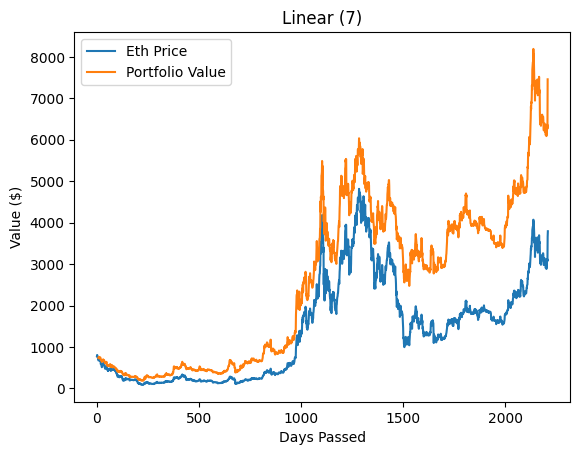

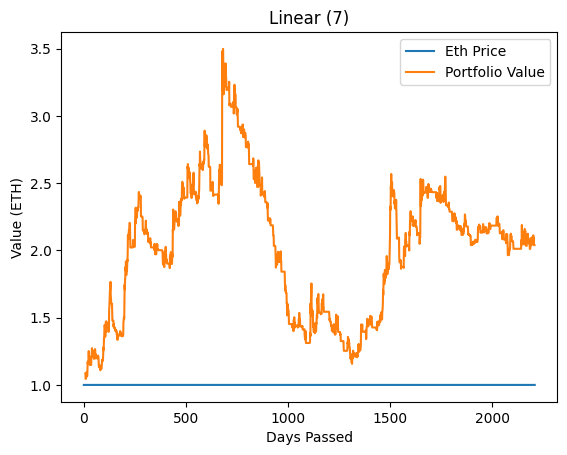

In [3]:
import signal_test

signal = LinearSignal(7)
signal_test.test_signal(signal, name='Linear (7)', plot_price=True, plot_normalized=True)